In [120]:
#Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import layers
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

Load and Explore the Fashion MNIST Dataset

In [121]:
# Step 1: Load and Explore the Fashion MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [122]:
# Class names in the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [123]:
# Display dataset structure
print(f"Training data shape: {train_images.shape}, Labels shape: {train_labels.shape}")
print(f"Testing data shape: {test_images.shape}, Labels shape: {test_labels.shape}")


Training data shape: (60000, 28, 28), Labels shape: (60000,)
Testing data shape: (10000, 28, 28), Labels shape: (10000,)


In [124]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

9


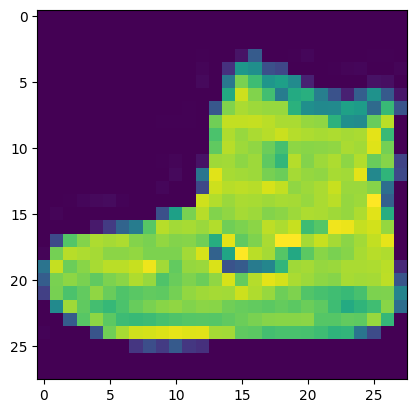

In [125]:
#Display the first image and its label
plt.imshow(train_images[0])
print(train_labels[0])

Data Preprocessing

In [141]:
# Scale the images to the [0, 1] range
train_images, test_images = train_images / 255.0, test_images / 255.0


Visualization

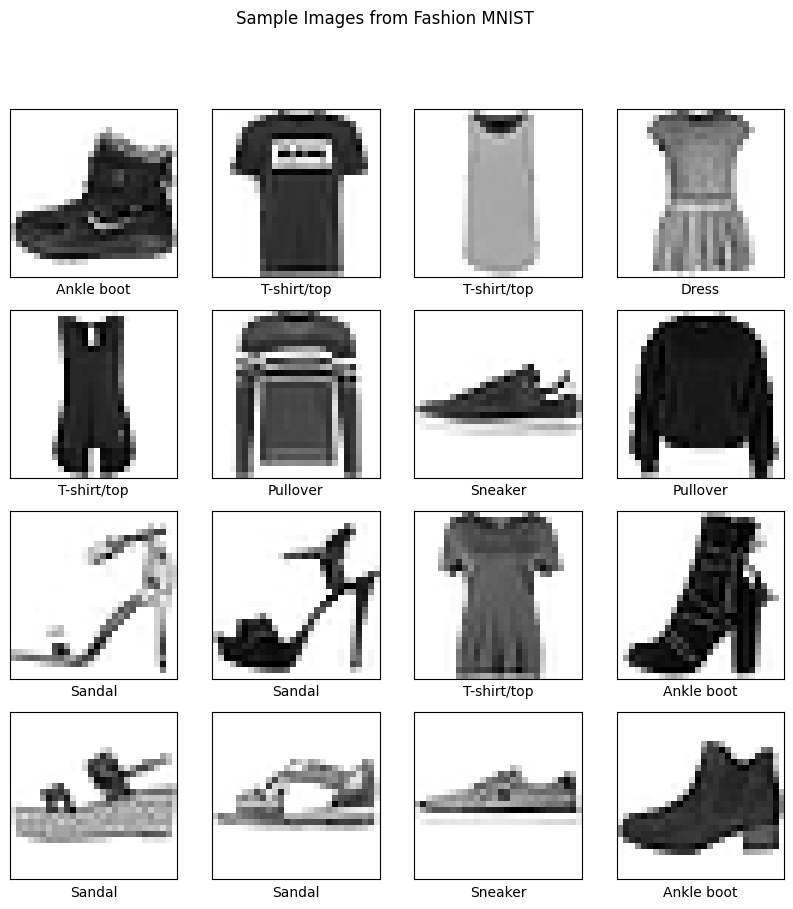

In [140]:
# Step 3: Visualizations
# Display sample images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.suptitle("Sample Images from Fashion MNIST")
plt.show()

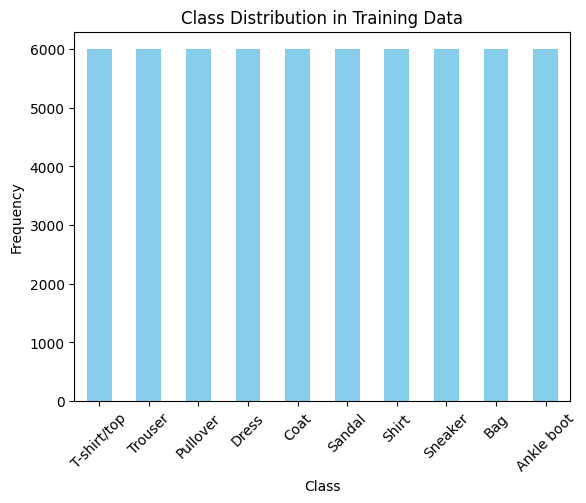

In [127]:
# Plot class distribution using pandas
train_labels_df = pd.DataFrame(train_labels, columns=['Label'])
class_counts = train_labels_df['Label'].value_counts().sort_index()
class_counts_df = pd.DataFrame({'Class': class_names, 'Count': class_counts.values})
class_counts_df.plot(kind='bar', x='Class', y='Count', legend=False, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in Training Data')
plt.show()

Build an Artificial Neural Network

In [128]:
# Step 4: Build the Artificial Neural Network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/Users/aishwaryakarki/Desktop/Projects/Fashion-MNIST-Classification-with-ANN/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [129]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Compile the Model

In [130]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the Model

In [143]:
# Step 6: Train the Model
history = model.fit(train_images, train_labels,epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.4470 - loss: 1.9390 - val_accuracy: 0.6587 - val_loss: 1.0776
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.7077 - loss: 0.9815 - val_accuracy: 0.7390 - val_loss: 0.7743
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.7426 - loss: 0.7561 - val_accuracy: 0.7619 - val_loss: 0.6711
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.7697 - loss: 0.6559 - val_accuracy: 0.7754 - val_loss: 0.6147
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.7821 - loss: 0.5999 - val_accuracy: 0.7933 - val_loss: 0.5670
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.8031 - loss: 0.5579 - val_accuracy: 0.8067 - val_loss: 0.5298
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.8181 - loss: 0.5137 - val_accuracy: 0.8184 - val_loss: 0.5064
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.8249 -

Evaluate the Model

In [144]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - 230us/step - accuracy: 0.8253 - loss: 0.4841

Test accuracy: 0.8252999782562256


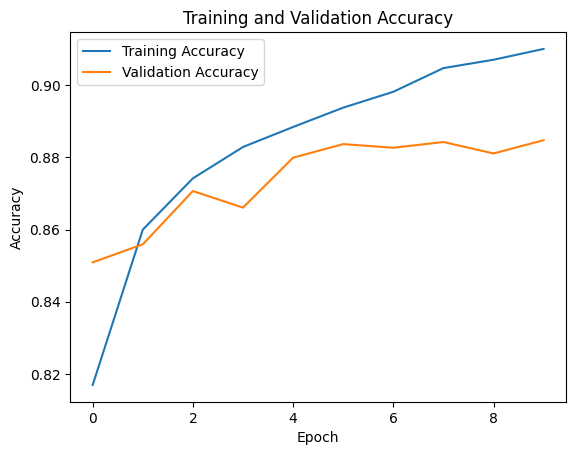

In [132]:
# Plot training & validation accuracy values
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

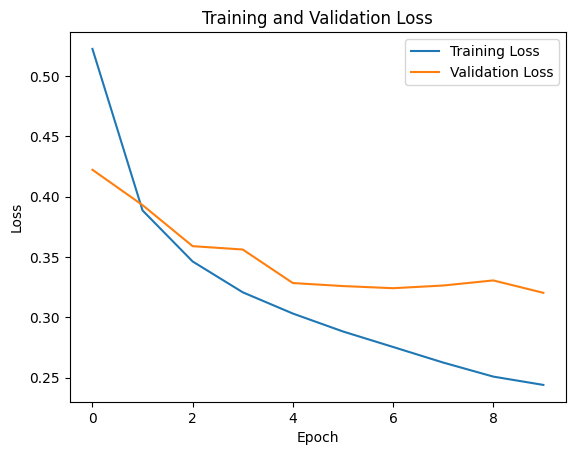

In [133]:
# Plot training & validation loss values
history_df[['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

Test Set Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step


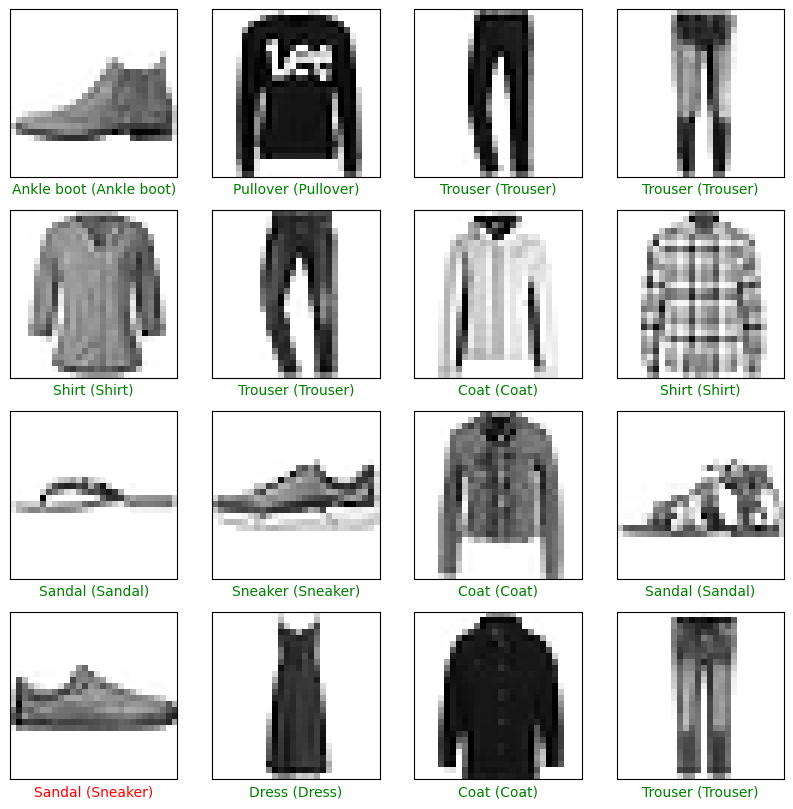

In [134]:
# Step 8: Test Set Prediction
predictions = model.predict(test_images)

# Display a few predictions with corresponding images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step


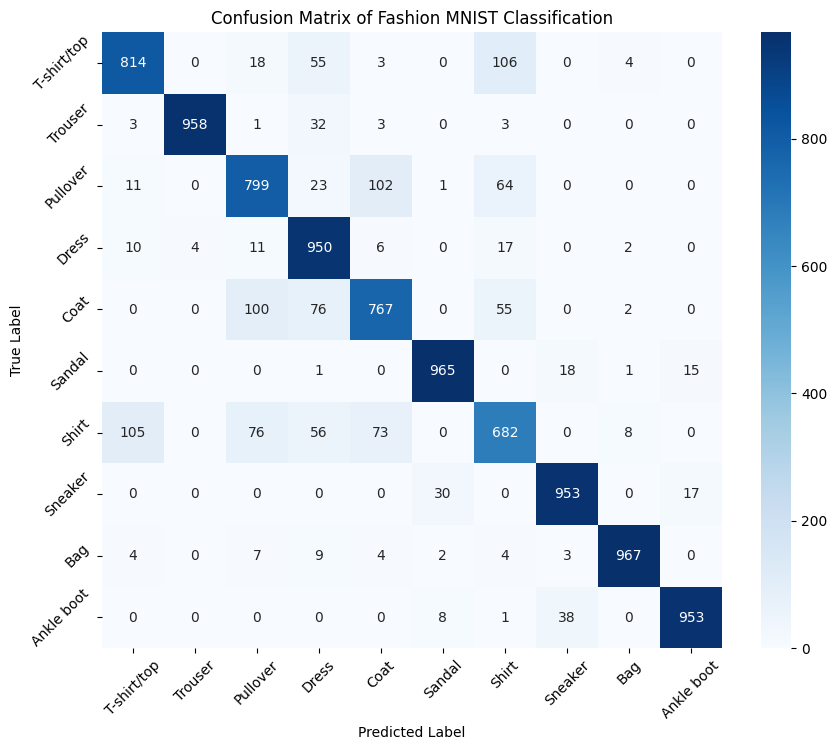

In [135]:
# Generate predictions on the test set
test_predictions = np.argmax(model.predict(test_images), axis=1)

# Define class names (if they are not explicitly needed in other parts of your code)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Step 9: Confusion Matrix
# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Fashion MNIST Classification')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()



In [136]:
def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    # Tune the number of units in the first Dense layer
    hp_units1 = hp.Int('units1', min_value=32, max_value=256, step=32)
    model.add(Dense(units=hp_units1, activation='relu'))

    # Tune the number of units in the second Dense layer
    hp_units2 = hp.Int('units2', min_value=32, max_value=256, step=32)
    model.add(Dense(units=hp_units2, activation='relu'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling="log")
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [137]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to train for each combination
    directory='my_dir',
    project_name='fashion_mnist_tuning'
)

Reloading Tuner from my_dir/fashion_mnist_tuning/tuner0.json


In [138]:
tuner.search(train_images, train_labels, epochs=10, validation_split=0.2)


In [139]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"The optimal number of units in the first layer: {best_hps.get('units1')}")
print(f"The optimal number of units in the second layer: {best_hps.get('units2')}")
print(f"The optimal learning rate: {best_hps.get('learning_rate')}")

# Build and train the best model with optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(train_images, train_labels, epochs=10, validation_split=0.2)


The optimal number of units in the first layer: 224
The optimal number of units in the second layer: 128
The optimal learning rate: 0.0005527499110471527
Epoch 1/10


/Users/aishwaryakarki/Desktop/Projects/Fashion-MNIST-Classification-with-ANN/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 956us/step - accuracy: 0.7762 - loss: 0.6489 - val_accuracy: 0.8568 - val_loss: 0.3926
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8627 - loss: 0.3773 - val_accuracy: 0.8687 - val_loss: 0.3612
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8778 - loss: 0.3320 - val_accuracy: 0.8799 - val_loss: 0.3362
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - accuracy: 0.8855 - loss: 0.3104 - val_accuracy: 0.8823 - val_loss: 0.3221
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.8926 - loss: 0.2886 - val_accuracy: 0.8832 - val_loss: 0.3232
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - accuracy: 0.9019 - loss: 0.2630 - val_accuracy: 0.8784 - val_loss: 0.3294
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.9051 - loss: 0.2553 - val_accuracy: 0.8872 - val_loss: 0.3205
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9087 - loss: 0.2390 - v